In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib

In [2]:
data = pd.read_csv("../../data/yfinance_data/AAPL_historical_data.csv")

print(data.head())

         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [3]:
data.set_index("Date", inplace=True)

## Data Analysis Indicators with Talib

In [4]:
data['SMA_50'] = talib.SMA(data['Close'], timeperiod=50)  # 50-day Simple Moving Average
data['EMA_20'] = talib.EMA(data['Close'], timeperiod=20)  # 20-day Exponential Moving Average


In [5]:
data['RSI'] = talib.RSI(data['Close'], timeperiod=14)


In [6]:
data['MACD'], data['MACD_Signal'], data['MACD_Hist'] = talib.MACD(
    data['Close'], fastperiod=12, slowperiod=26, signalperiod=9
)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10998 entries, 1980-12-12 to 2024-07-30
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          10998 non-null  float64
 1   High          10998 non-null  float64
 2   Low           10998 non-null  float64
 3   Close         10998 non-null  float64
 4   Adj Close     10998 non-null  float64
 5   Volume        10998 non-null  int64  
 6   Dividends     10998 non-null  float64
 7   Stock Splits  10998 non-null  float64
 8   SMA_50        10949 non-null  float64
 9   EMA_20        10979 non-null  float64
 10  RSI           10984 non-null  float64
 11  MACD          10965 non-null  float64
 12  MACD_Signal   10965 non-null  float64
 13  MACD_Hist     10965 non-null  float64
dtypes: float64(13), int64(1)
memory usage: 1.3+ MB


In [8]:
data['SMA_50']

Date
1980-12-12           NaN
1980-12-15           NaN
1980-12-16           NaN
1980-12-17           NaN
1980-12-18           NaN
                 ...    
2024-07-24    208.474199
2024-07-25    209.098399
2024-07-26    209.709000
2024-07-29    210.279400
2024-07-30    210.858600
Name: SMA_50, Length: 10998, dtype: float64

In [9]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_50,EMA_20,RSI,MACD,MACD_Signal,MACD_Hist
Date,,,,,,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


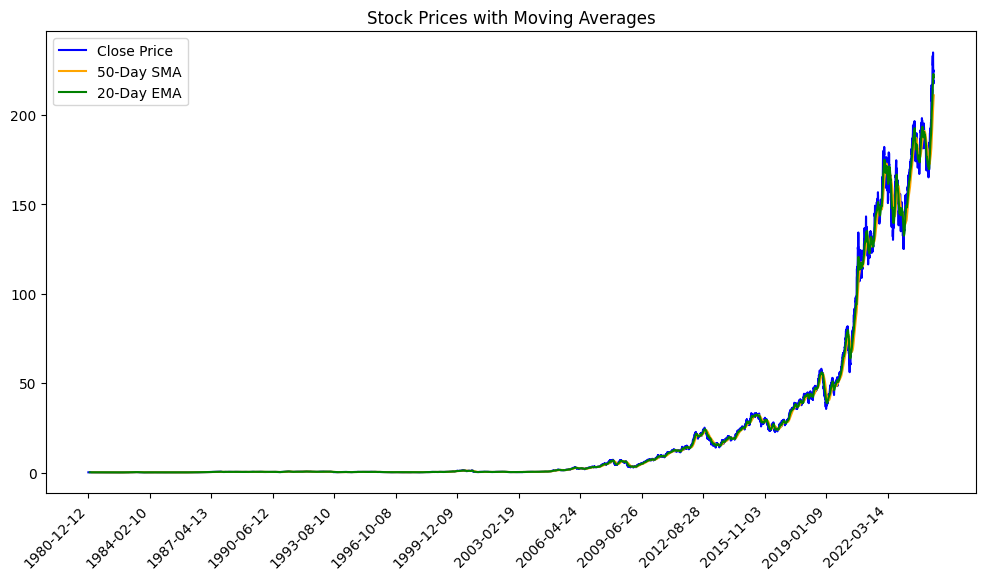

In [10]:

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.plot(data.index, data['SMA_50'], label='50-Day SMA', color='orange')
plt.plot(data.index, data['EMA_20'], label='20-Day EMA', color='green')
plt.title('Stock Prices with Moving Averages')
plt.xticks(
    data.index[::800], 
    rotation=45,               
    ha='right'                 
)
plt.legend()
plt.show()


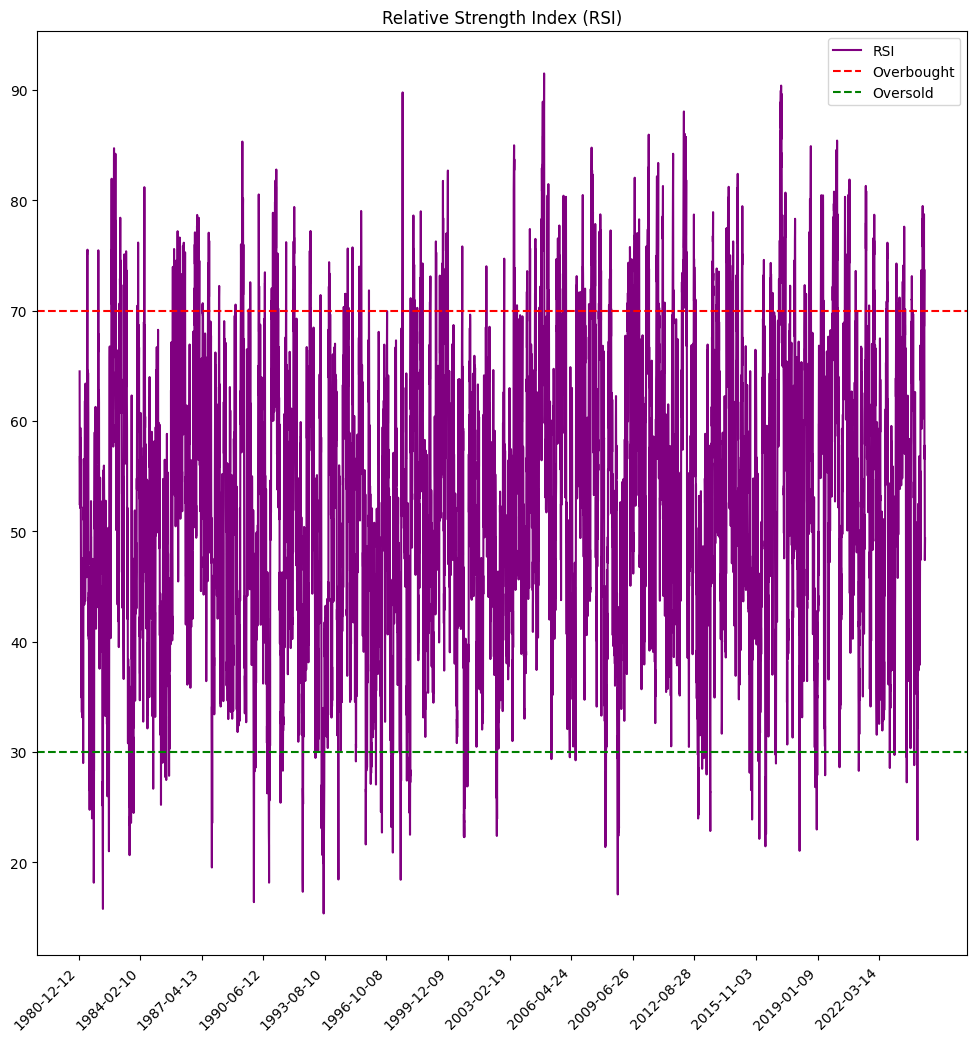

In [11]:
plt.figure(figsize=(12, 12))
plt.plot(data.index, data['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.title('Relative Strength Index (RSI)')
plt.xticks(
    data.index[::800], 
    rotation=45,               
    ha='right'                 
)
plt.legend()
plt.show()


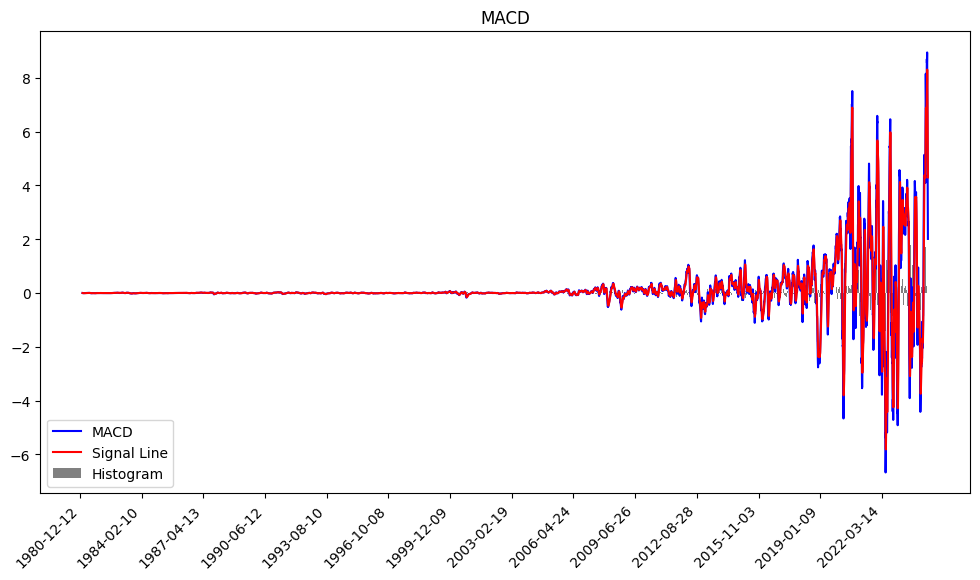

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['MACD'], label='MACD', color='blue')
plt.plot(data.index, data['MACD_Signal'], label='Signal Line', color='red')
plt.bar(data.index, data['MACD_Hist'], label='Histogram', color='gray')
plt.title('MACD')
plt.legend()
plt.xticks(
    data.index[::800], 
    rotation=45,               
    ha='right'                 
)
plt.show()


## Using Pynance for Financial Metrics

In [13]:

# Step 2: Calculate log returns for volatility and Sharpe Ratio
data['Log_Returns'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

# Step 3: Calculate Volatility (Standard deviation of log returns)
volatility = data['Log_Returns'].std() * np.sqrt(252)  # Annualized volatility (252 trading days)

# Step 4: Calculate Sharpe Ratio (Assuming risk-free rate = 0)
sharpe_ratio = data['Log_Returns'].mean() / data['Log_Returns'].std() * np.sqrt(252)

# Step 5: Calculate Maximum Drawdown
data['Cumulative_Returns'] = (1 + data['Log_Returns']).cumprod()
data['Cumulative_Max'] = data['Cumulative_Returns'].cummax()
data['Drawdown'] = data['Cumulative_Returns'] / data['Cumulative_Max'] - 1
max_drawdown = data['Drawdown'].min()

In [14]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_50,EMA_20,RSI,MACD,MACD_Signal,MACD_Hist,Log_Returns,Cumulative_Returns,Cumulative_Max,Drawdown
Date,,,,,,,,,,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.053581,0.946419,0.946419,0.000000
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.076231,0.874273,0.946419,-0.076231
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.024449,0.895648,0.946419,-0.053645
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.028580,0.921246,0.946419,-0.026599


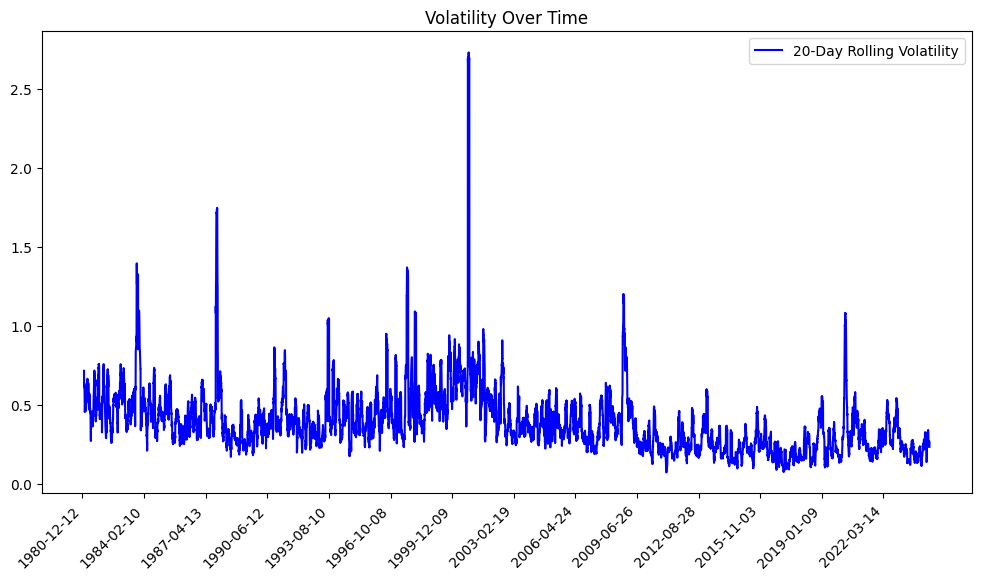

In [15]:
data['Rolling_Volatility'] = data['Log_Returns'].rolling(window=20).std() * np.sqrt(252)

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Rolling_Volatility'], label='20-Day Rolling Volatility', color='blue')
plt.title('Volatility Over Time')
plt.legend()
plt.xticks(
    data.index[::800], 
    rotation=45,               
    ha='right'                 
)
plt.show()


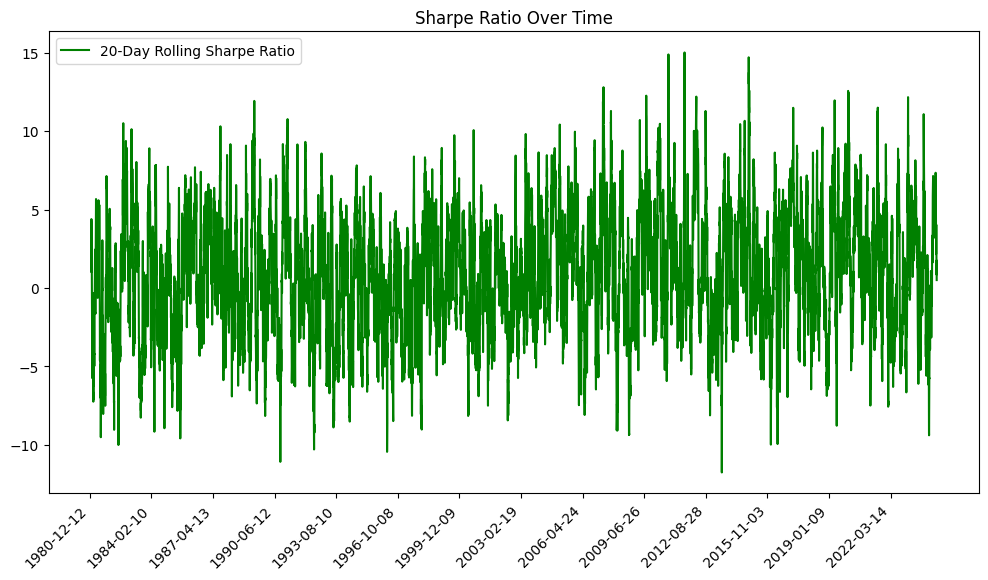

In [16]:
data['Rolling_Sharpe'] = data['Log_Returns'].rolling(window=20).mean() / data['Log_Returns'].rolling(window=20).std() * np.sqrt(252)

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Rolling_Sharpe'], label='20-Day Rolling Sharpe Ratio', color='green')
plt.title('Sharpe Ratio Over Time')
plt.legend()
plt.xticks(
    data.index[::800], 
    rotation=45,               
    ha='right'                 
)
plt.show()


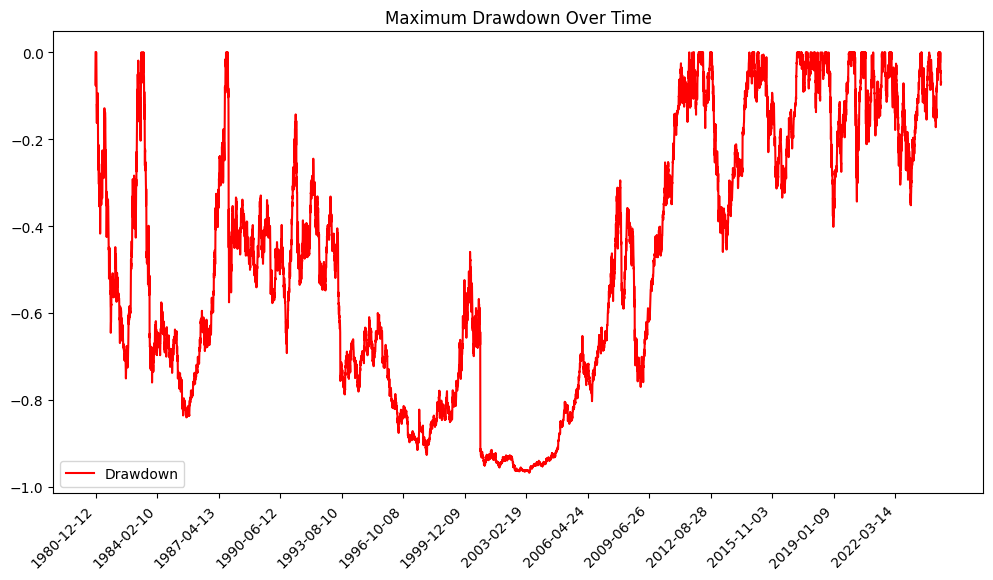

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Drawdown'], label='Drawdown', color='red')
plt.title('Maximum Drawdown Over Time')
plt.legend()
plt.xticks(
    data.index[::800], 
    rotation=45,               
    ha='right'                 
)
plt.show()


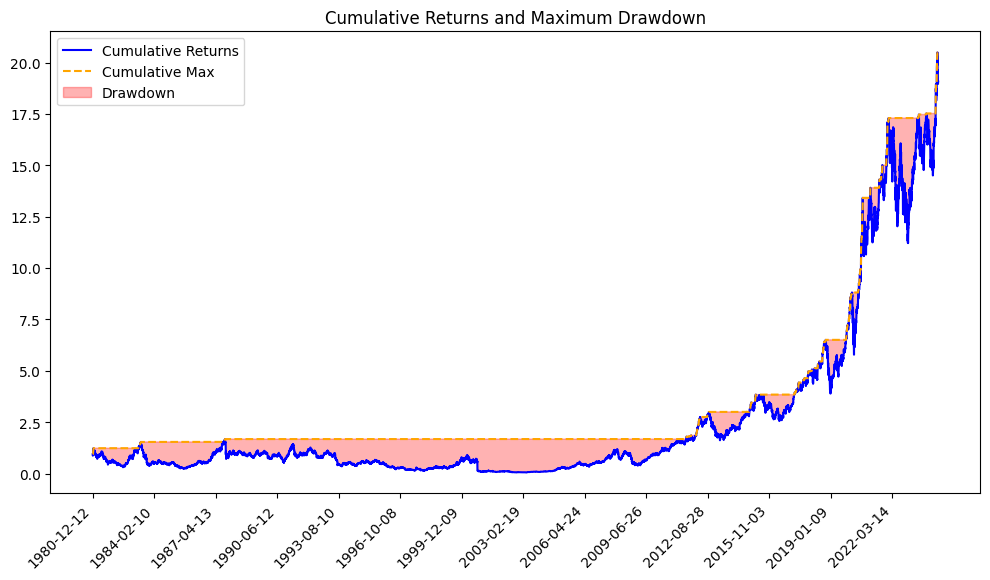

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Cumulative_Returns'], label='Cumulative Returns', color='blue')
plt.plot(data.index, data['Cumulative_Max'], label='Cumulative Max', color='orange', linestyle='--')
plt.fill_between(data.index, data['Cumulative_Returns'], data['Cumulative_Max'], where=(data['Cumulative_Returns'] < data['Cumulative_Max']), color='red', alpha=0.3, label='Drawdown')
plt.title('Cumulative Returns and Maximum Drawdown')
plt.legend()
plt.xticks(
    data.index[::800], 
    rotation=45,               
    ha='right'                 
)
plt.show()